# AE simulations
Comparing results of E+ v9.2 to v9.5 where the incident solar angle bug was fixed.

Annual energy and demand data only.

3 vintages, 6 climate zones (NREL's default cities)

In [1]:
# Dependencies
import pandas as pd
import os
import numpy as np
import scipy.stats as sts
from scipy.stats import linregress
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# # 2018 Egrid Costs (elec $/kWh, gas $/therm), change values per city
# gas = 0.83
# elec = 0.1314

---

## Import all csv files

In [3]:
energy92_path = "data/AllEnergy_92.csv"
energy95_path = "data/AllEnergy_95.csv"
demand92_path = "data/AllDemand_92.csv"
demand95_path = "data/AllDemand_95.csv"
energyAll_path = "data/AllEnergy.csv"

In [4]:
energyAll = pd.read_csv(energyAll_path)

In [5]:
energyAll

,Run,Climate,System,Parametric,Heating [kBtu]_92,Cooling [kBtu]_92,Fan [kBtu]_92,Heat [kWh]_92,Cool [kWh]_92,Fan [kWh]_92,...,Cooling [kBtu]_95,Fan [kBtu]_95,Heat [kWh]_95,Cool [kWh]_95,Fan [kWh]_95,U,SHGC,Heat%Diff,Cool%Diff,Fan%Diff
0,1,2A,Elec,HOU+elecres+slab+IECC_1990_para00001Table.csv,25220.00,14089.00,3307.00,7389.39,4127.99,968.94000,...,14406.00,3368.00,7316.61,4221.03,986.70000,0.1,0.10,-0.987312,2.249982,1.844572
1,2,2A,Elec,HOU+elecres+slab+IECC_1990_para00002Table.csv,23643.00,16177.00,3798.00,6927.51,4739.98,1112.81000,...,16518.00,3867.00,6870.68,4839.71,1133.11000,0.1,0.25,-0.820539,2.107931,1.816746
2,3,2A,Elec,HOU+elecres+slab+IECC_1990_para00003Table.csv,22708.00,17683.00,4177.00,6653.42,5181.25,1223.82000,...,18593.00,4366.00,6523.36,5447.70,1279.16000,0.1,0.40,-1.955258,5.146186,4.524779
3,4,2A,Elec,HOU+elecres+slab+IECC_1990_para00004Table.csv,21711.00,19651.00,4656.00,6361.33,5757.74,1364.15000,...,20746.00,4889.00,6235.11,6078.66,1432.36000,0.1,0.55,-1.985169,5.572236,5.004296
4,5,2A,Elec,HOU+elecres+slab+IECC_1990_para00005Table.csv,20683.00,22213.00,5264.00,6060.18,6508.37,1542.50000,...,22843.00,5404.00,6005.09,6692.96,1583.38000,0.1,0.70,-0.908959,2.836177,2.659574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,32,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00032Table.csv,128161.87,1760.92,3516.04,37551.43,515.90,1030.19972,...,1807.05,3518.20,37478.84,529.50,1030.83260,1.1,0.25,-0.193302,2.619653,0.061433
1292,33,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00033Table.csv,122454.67,2589.41,3630.30,35879.22,758.70,1063.67790,...,2699.13,3649.19,35737.91,790.80,1069.21267,1.1,0.40,-0.393844,4.237259,0.520343
1293,34,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00034Table.csv,117201.25,3608.64,3870.18,34339.97,1057.30,1133.96274,...,3593.43,3854.46,34363.97,1052.90,1129.35678,1.1,0.55,0.069888,-0.421488,-0.406183
1294,35,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00035Table.csv,112694.09,4638.14,4532.28,33019.37,1359.00,1327.95804,...,4630.20,4517.80,33026.14,1356.60,1323.71540,1.1,0.70,0.020516,-0.171189,-0.319486


## Find the percent difference from 9.2 to 9.5

In [6]:
energyAll["HeatingPercentDifference"] = ((energyAll['Heating [kBtu]_95'] - energyAll['Heating [kBtu]_92']) / energyAll['Heating [kBtu]_92']) * 100
energyAll["CoolingPercentDifference"] = ((energyAll['Cooling [kBtu]_95'] - energyAll['Cooling [kBtu]_92']) / energyAll['Cooling [kBtu]_92']) * 100
energyAll["FanPercentDifference"] = ((energyAll['Fan [kBtu]_95'] - energyAll['Fan [kBtu]_92']) / energyAll['Fan [kBtu]_92']) * 100

energyAll

,Run,Climate,System,Parametric,Heating [kBtu]_92,Cooling [kBtu]_92,Fan [kBtu]_92,Heat [kWh]_92,Cool [kWh]_92,Fan [kWh]_92,...,Cool [kWh]_95,Fan [kWh]_95,U,SHGC,Heat%Diff,Cool%Diff,Fan%Diff,HeatingPercentDifference,CoolingPercentDifference,FanPercentDifference
0,1,2A,Elec,HOU+elecres+slab+IECC_1990_para00001Table.csv,25220.00,14089.00,3307.00,7389.39,4127.99,968.94000,...,4221.03,986.70000,0.1,0.10,-0.987312,2.249982,1.844572,-0.987312,2.249982,1.844572
1,2,2A,Elec,HOU+elecres+slab+IECC_1990_para00002Table.csv,23643.00,16177.00,3798.00,6927.51,4739.98,1112.81000,...,4839.71,1133.11000,0.1,0.25,-0.820539,2.107931,1.816746,-0.820539,2.107931,1.816746
2,3,2A,Elec,HOU+elecres+slab+IECC_1990_para00003Table.csv,22708.00,17683.00,4177.00,6653.42,5181.25,1223.82000,...,5447.70,1279.16000,0.1,0.40,-1.955258,5.146186,4.524779,-1.955258,5.146186,4.524779
3,4,2A,Elec,HOU+elecres+slab+IECC_1990_para00004Table.csv,21711.00,19651.00,4656.00,6361.33,5757.74,1364.15000,...,6078.66,1432.36000,0.1,0.55,-1.985169,5.572236,5.004296,-1.985169,5.572236,5.004296
4,5,2A,Elec,HOU+elecres+slab+IECC_1990_para00005Table.csv,20683.00,22213.00,5264.00,6060.18,6508.37,1542.50000,...,6692.96,1583.38000,0.1,0.70,-0.908959,2.836177,2.659574,-0.908959,2.836177,2.659574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,32,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00032Table.csv,128161.87,1760.92,3516.04,37551.43,515.90,1030.19972,...,529.50,1030.83260,1.1,0.25,-0.193302,2.619653,0.061433,-0.193302,2.619653,0.061433
1292,33,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00033Table.csv,122454.67,2589.41,3630.30,35879.22,758.70,1063.67790,...,790.80,1069.21267,1.1,0.40,-0.393844,4.237259,0.520343,-0.393844,4.237259,0.520343
1293,34,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00034Table.csv,117201.25,3608.64,3870.18,34339.97,1057.30,1133.96274,...,1052.90,1129.35678,1.1,0.55,0.069888,-0.421488,-0.406183,0.069888,-0.421488,-0.406183
1294,35,7,Gas,DLH+gasfurnace+slab+IECC_2018_para00035Table.csv,112694.09,4638.14,4532.28,33019.37,1359.00,1327.95804,...,1356.60,1323.71540,1.1,0.70,0.020516,-0.171189,-0.319486,0.020516,-0.171189,-0.319486


In [7]:
energyAll_group= energyAll.groupby(["Climate", "System"])

energyAll_group.mean()

Run  Heating [kBtu]_92  Cooling [kBtu]_92  Fan [kBtu]_92  \
Climate System                                                              
2A      Elec    18.5       21216.585370       17446.505185    4168.479907   
        Gas     18.5       23961.121204       18826.309537    4409.193519   
3A      Elec    18.5       39226.743056       13477.516296    3836.124907   
        Gas     18.5       45373.194167       14570.649167    4026.291759   
4A      Elec    18.5       59528.803611        8388.841852    3536.296204   
        Gas     18.5       69494.276111        9199.888889    3683.952130   
5A      Elec    18.5       85885.849722        6810.460000    4536.547778   
        Gas     18.5      101742.563889        7489.510370    4651.816296   
6A      Elec    18.5       96556.567222        4382.406204    4241.005093   
        Gas     18.5      114565.004074        4919.988056    4311.706944   
7       Elec    18.5      128564.676389        3115.838426    4888.145741   
        Gas     18.5      153912.019259        3508.740648    4872.584907   

                Heat [kWh]_92  Cool [kWh]_92  Fan [kWh]_92  Heating [kBtu]_95  \
Climate System                                                                  
2A      Elec      6216.463704    5111.822037   1221.362159       21046.996389   
        Gas       7020.604907    5516.098148   1291.895988       23772.360833   
3A      Elec     11493.435926    3948.915741   1123.984598       38952.098426   
        Gas      13294.345833    4269.202778   1179.703485       45061.717593   
4A      Elec     17441.939722    2457.932407   1036.134788       59108.257500   
        Gas      20361.822661    2695.572028   1079.397974       69006.219537   
5A      Elec     25164.553796    1995.461111   1329.208499       85426.766389   
        Gas      29810.571389    2194.430556   1362.982175      101196.580741   
6A      Elec     28291.073889    1284.041667   1242.614492       96034.931667   
        Gas      33567.546204    1441.555556   1263.330135      113944.791111   
7       Elec     37669.450000     912.937963   1432.226702      127955.197870   
        Gas      45096.221389    1028.063889   1427.667378      153191.243796   

                Cooling [kBtu]_95  Fan [kBtu]_95  ...  Cool [kWh]_95  \
Climate System                                    ...                  
2A      Elec         17768.790648    4235.563611  ...    5206.256019   
        Gas          19151.497222    4476.155833  ...    5611.382037   
3A      Elec         13779.255556    3901.434074  ...    4037.322222   
        Gas          14874.305370    4091.843981  ...    4358.175926   
4A      Elec          8621.843056    3598.503981  ...    2526.196296   
        Gas           9436.290000    3744.690556  ...    2764.832838   
5A      Elec          7019.234259    4592.362222  ...    2056.635185   
        Gas           7702.163611    4711.380833  ...    2256.734259   
6A      Elec          4553.744352    4285.364907  ...    1334.246296   
        Gas           5097.621667    4360.857500  ...    1493.601852   
7       Elec          3265.768333    4914.334259  ...     956.866667   
        Gas           3665.981204    4902.031852  ...    1074.131481   

                Fan [kWh]_95    U   SHGC  Heat%Diff  Cool%Diff  Fan%Diff  \
Climate System                                                             
2A      Elec     1241.015481  0.6  0.475  -0.863851   2.125976  1.883536   
        Gas      1311.522131  0.6  0.475  -0.858017   1.960194  1.759144   
3A      Elec     1143.120184  0.6  0.475  -0.789787   2.649087  2.039925   
        Gas      1198.910287  0.6  0.475  -0.782129   2.429070  1.927946   
4A      Elec     1054.361667  0.6  0.475  -0.804515   3.395709  2.121594   
        Gas      1097.194333  0.6  0.475  -0.806881   3.073964  1.964241   
5A      Elec     1345.562131  0.6  0.475  -0.616654   3.846782  1.531068   
        Gas      1380.434584  0.6  0.475  -0.624481   3.464859  1.573305   
6A      Elec     1255.611918  0.6 

## 3A Memphis 

In [8]:
energy_mem1990_elec = energyAll[216:252]

energy_mem2006_elec = energyAll[252:288]

energy_mem2018_elec = energyAll[288:324]

energy_mem1990_gas = energyAll[324:360]

energy_mem2006_gas = energyAll[360:396]

energy_mem2018_gas = energyAll[396:432]

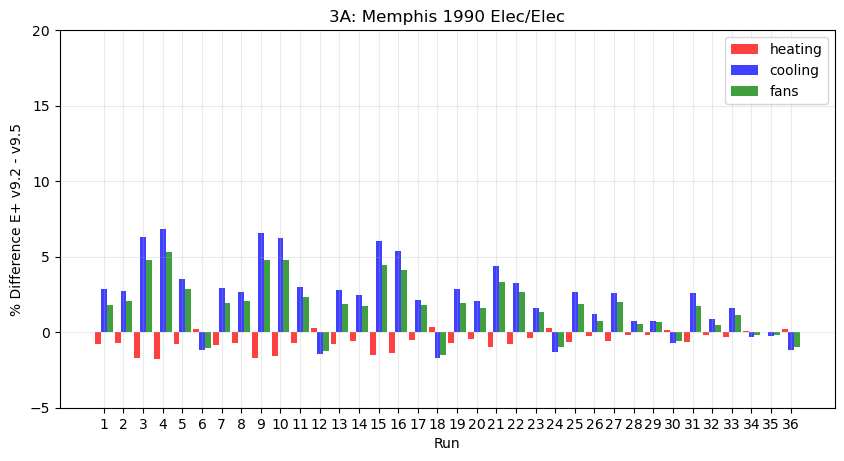

In [9]:
# MEM 1990 elec/elec

x1 = energy_mem1990_elec["Run"]
heating1 = energy_mem1990_elec["HeatingPercentDifference"]
cooling1 = energy_mem1990_elec["CoolingPercentDifference"]
fans1 = energy_mem1990_elec["FanPercentDifference"]
w = .3

figure(figsize=(10,5), dpi=100)

ax = plt.subplot(111)
ax.bar(x1-w, heating1, width=w, color="r", label="heating", align="center", alpha=.75)
ax.bar(x1, cooling1, width=w, color="b", label="cooling",  align="center", alpha=.75)
ax.bar(x1+w, fans1, width=w, color="g", label="fans",  align="center", alpha=.75)

plt.legend()
plt.grid(alpha=.25)
plt.title("3A: Memphis 1990 Elec/Elec")
plt.xlabel("Run")
plt.xticks(x1)
plt.ylim([-5, 20])
plt.ylabel("% Difference E+ v9.2 - v9.5")

plt.savefig("images/mem1990elec.png")
plt.show()

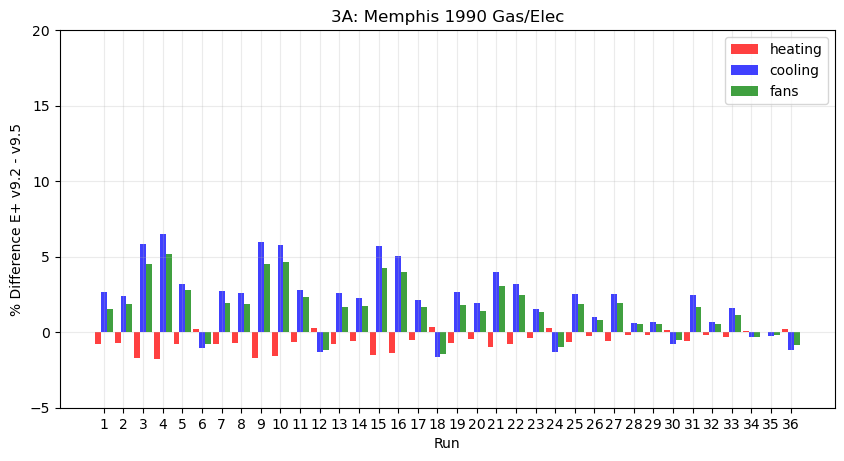

In [10]:
# MEM 1990 gas/elec

x2 = energy_mem1990_gas["Run"]
heating2 = energy_mem1990_gas["HeatingPercentDifference"]
cooling2 = energy_mem1990_gas["CoolingPercentDifference"]
fans2 = energy_mem1990_gas["FanPercentDifference"]
w = .3

figure(figsize=(10,5), dpi=100)

ax = plt.subplot(111)
ax.bar(x2-w, heating2, width=w, color="r", label="heating", align="center", alpha=.75)
ax.bar(x2, cooling2, width=w, color="b", label="cooling",  align="center", alpha=.75)
ax.bar(x2+w, fans2, width=w, color="g", label="fans",  align="center", alpha=.75)


plt.legend()
plt.grid(alpha=.25)
plt.title("3A: Memphis 1990 Gas/Elec")
plt.xlabel("Run")
plt.xticks(x2)
plt.ylim([-5, 20])
plt.ylabel("% Difference E+ v9.2 - v9.5")

plt.savefig("images/mem1990gas.png")
plt.show()

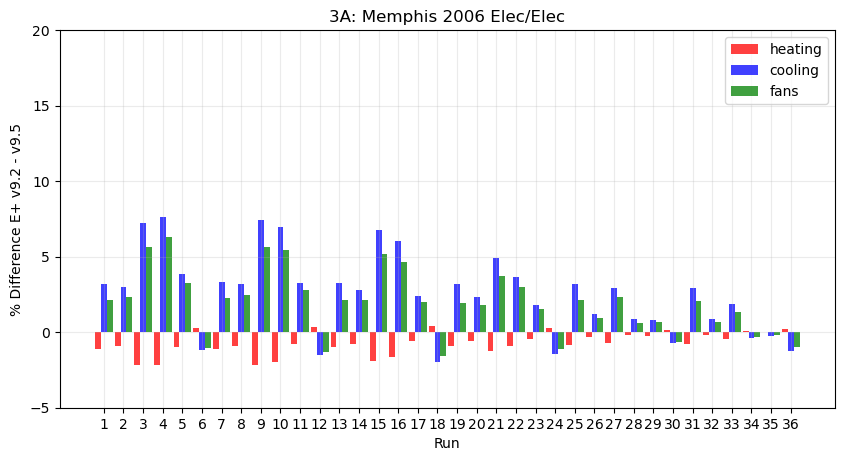

In [11]:
# MEM 2006 elec/elec

x3 = energy_mem2006_elec["Run"]
heating3 = energy_mem2006_elec["HeatingPercentDifference"]
cooling3 = energy_mem2006_elec["CoolingPercentDifference"]
fans3 = energy_mem2006_elec["FanPercentDifference"]
w = .3

figure(figsize=(10,5), dpi=100)

ax = plt.subplot(111)
ax.bar(x3-w, heating3, width=w, color="r", label="heating", align="center", alpha=.75)
ax.bar(x3, cooling3, width=w, color="b", label="cooling",  align="center", alpha=.75)
ax.bar(x3+w, fans3, width=w, color="g", label="fans",  align="center", alpha=.75)


plt.legend()
plt.grid(alpha=.25)
plt.title("3A: Memphis 2006 Elec/Elec")
plt.xlabel("Run")
plt.xticks(x3)
plt.ylim([-5, 20])
plt.ylabel("% Difference E+ v9.2 - v9.5")

plt.savefig("images/mem2006elec.png")
plt.show()

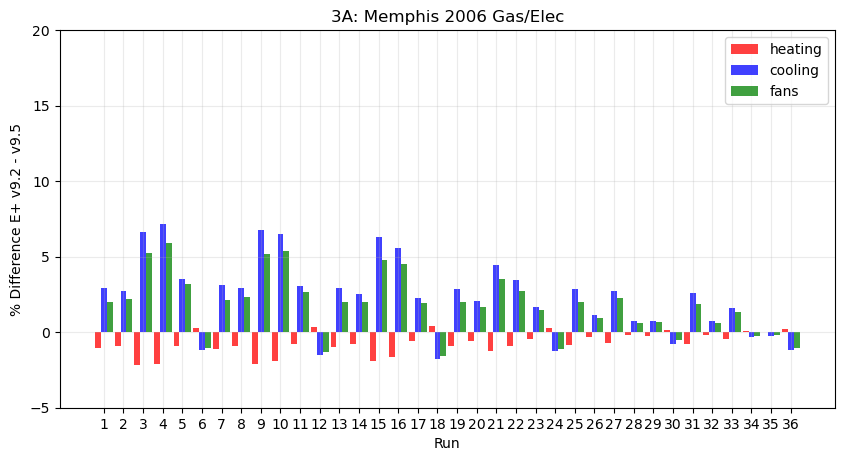

In [12]:
# MEM 2006 gas/elec

x4 = energy_mem2006_gas["Run"]
heating4 = energy_mem2006_gas["HeatingPercentDifference"]
cooling4 = energy_mem2006_gas["CoolingPercentDifference"]
fans4 = energy_mem2006_gas["FanPercentDifference"]
w = .3

figure(figsize=(10,5), dpi=100)

ax = plt.subplot(111)
ax.bar(x4-w, heating4, width=w, color="r", label="heating", align="center", alpha=.75)
ax.bar(x4, cooling4, width=w, color="b", label="cooling",  align="center", alpha=.75)
ax.bar(x4+w, fans4, width=w, color="g", label="fans",  align="center", alpha=.75)

plt.legend()
plt.grid(alpha=.25)
plt.title("3A: Memphis 2006 Gas/Elec")
plt.xlabel("Run")
plt.xticks(x4)
plt.ylim([-5, 20])
plt.ylabel("% Difference E+ v9.2 - v9.5")

plt.savefig("images/mem2006gas.png")
plt.show()

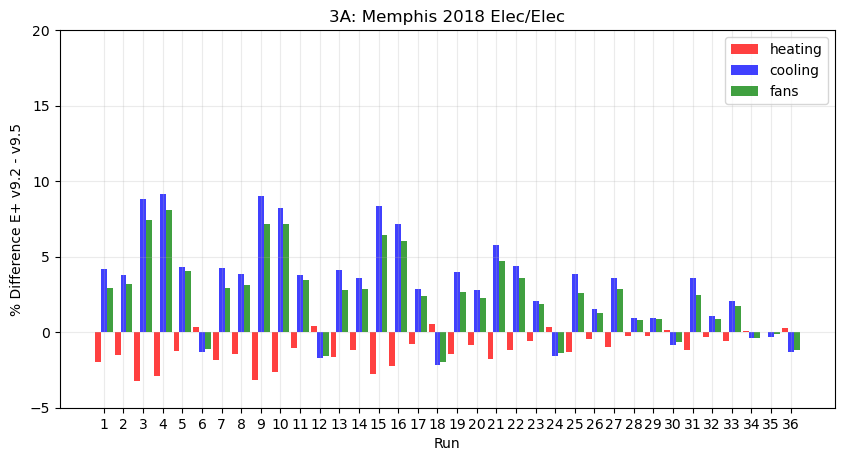

In [13]:
# MEM 2018 elec/elec

x5 = energy_mem2018_elec["Run"]
heating5 = energy_mem2018_elec["HeatingPercentDifference"]
cooling5 = energy_mem2018_elec["CoolingPercentDifference"]
fans5 = energy_mem2018_elec["FanPercentDifference"]
w = .3

figure(figsize=(10,5), dpi=100)

ax = plt.subplot(111)
ax.bar(x5-w, heating5, width=w, color="r", label="heating", align="center", alpha=.75)
ax.bar(x5, cooling5, width=w, color="b", label="cooling",  align="center", alpha=.75)
ax.bar(x5+w, fans5, width=w, color="g", label="fans",  align="center", alpha=.75)


plt.legend()
plt.grid(alpha=.25)
plt.title("3A: Memphis 2018 Elec/Elec")
plt.xlabel("Run")
plt.xticks(x5)
plt.ylim([-5, 20])
plt.ylabel("% Difference E+ v9.2 - v9.5")

plt.savefig("images/mem2018elec.png")
plt.show()

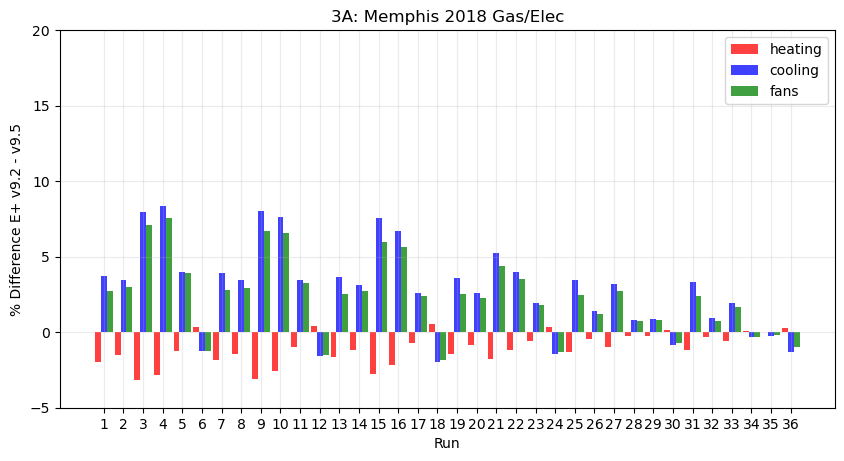

In [14]:
# MEM 2018 gas/elec

x6 = energy_mem2018_gas["Run"]
heating6 = energy_mem2018_gas["HeatingPercentDifference"]
cooling6 = energy_mem2018_gas["CoolingPercentDifference"]
fans6 = energy_mem2018_gas["FanPercentDifference"]
w = .3

figure(figsize=(10,5), dpi=100)

ax = plt.subplot(111)
ax.bar(x6-w, heating6, width=w, color="r", label="heating", align="center", alpha=.75)
ax.bar(x6, cooling6, width=w, color="b", label="cooling",  align="center", alpha=.75)
ax.bar(x6+w, fans6, width=w, color="g", label="fans",  align="center", alpha=.75)

plt.legend()
plt.grid(alpha=.25)
plt.title("3A: Memphis 2018 Gas/Elec")
plt.xlabel("Run")
plt.xticks(x6)
plt.ylim([-5, 20])
plt.ylabel("% Difference E+ v9.2 - v9.5")

plt.savefig("images/mem2018gas.png")
plt.show()